## Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import missingno as msno
import warnings

plt.style.use('seaborn')
sns.set(font_scale = 1.2, style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Part 1: Exploratory Data Analysis(EDA)

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Types of features
#### Categorical features: 
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.
#### Ordinal features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.
#### Continuous features:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
for col in df_train.columns:
    msg = 'column: {:<11}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived   	 Percent of NaN value: 0.00%
column: Pclass     	 Percent of NaN value: 0.00%
column: Name       	 Percent of NaN value: 0.00%
column: Sex        	 Percent of NaN value: 0.00%
column: Age        	 Percent of NaN value: 19.87%
column: SibSp      	 Percent of NaN value: 0.00%
column: Parch      	 Percent of NaN value: 0.00%
column: Ticket     	 Percent of NaN value: 0.00%
column: Fare       	 Percent of NaN value: 0.00%
column: Cabin      	 Percent of NaN value: 77.10%
column: Embarked   	 Percent of NaN value: 0.22%


The features Age, Cabin and Embarked have null values.

### Let's examine how many have survived.

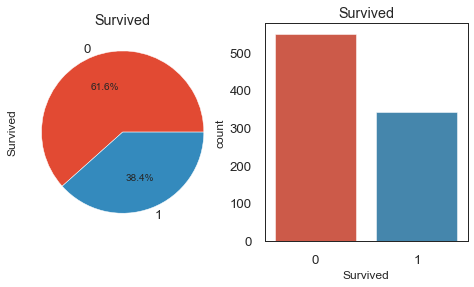

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8,4))  # a figure with a 1x2 grid of Axes
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Survived')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Out of 891 passengers in the training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. 

### Examine the Features

#### Categorical Feature: Sex

In [11]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

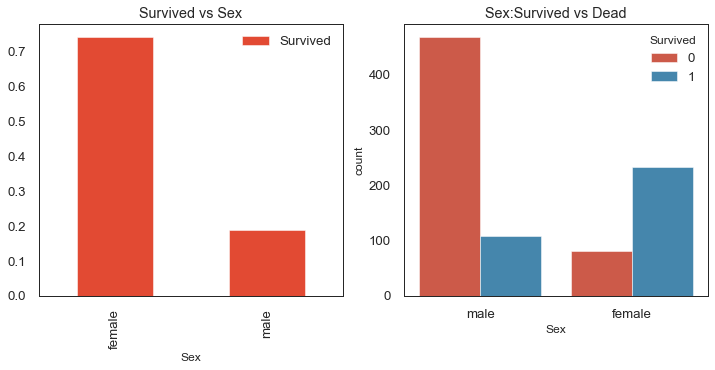

In [13]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature for modeling. But is it the best?? Lets check other features.

#### Ordinal Feature : Pclass

In [14]:
df_train.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc ='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


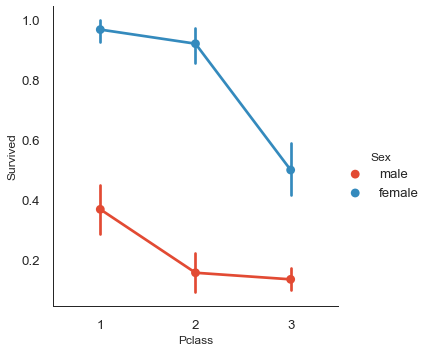

In [15]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

It looks like female in Pclass 1 and Pclass 2 had a pretty high survival rate. However, for male the Pclass type did not affect the survival rate that much.

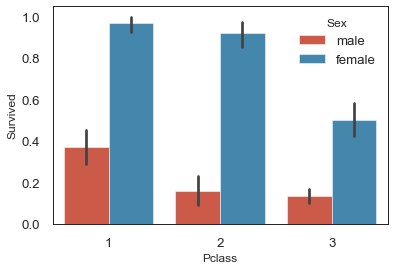

In [16]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

### Explore how age affects survival
To simply and visualize how different ranges of age have affected survival, categorize the range of age.
First, let's double Check if there's a negative number in the Age column.

In [17]:
any(df_train['Age']<0)

False

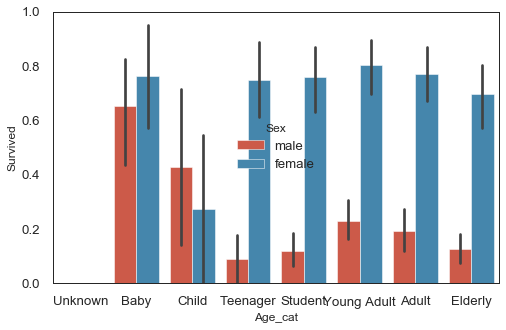

In [18]:
ar = df_train['Age'].isnull().values    
    
def get_category(age):
    cat=''
    for i in range(len(ar)):
        if ar[i]:
            cat = 'Unknown'
        else:
            if age <=5:
                cat = 'Baby'
            elif age <=12:
                cat = 'Child'
            elif age <=18:
                cat = 'Teenager'
            elif age <=25:
                cat = 'Student'
            elif age <=35:
                cat = 'Young Adult'
            elif age <=60:
                cat = 'Adult'
            else: 
                cat = 'Elderly'        
    return cat

plt.figure(figsize=(8,5))

group_names = ['Unknown','Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
df_train['Age_cat'] = df_train['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df_train, order=group_names)  
df_train.drop('Age_cat', axis=1, inplace=True)

Did age affect survival rate? It seems that age did not matter for female overall except for the Child age band which unusually had a lower survial rate than that of the male. For male, age did matter. Babies and children had a higher survial rate than the older aged people.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

''What's In A Name??''---> Feature :p

In [19]:
df_train['Initial'] = 0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [20]:
pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [21]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [22]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [23]:
df_train.groupby('Initial')['Age'].mean() #let's check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
## Assigning the NaN Values with the Ceil values of the mean ages
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [25]:
df_train.Age.isnull().any() #So no null values left finally 

False

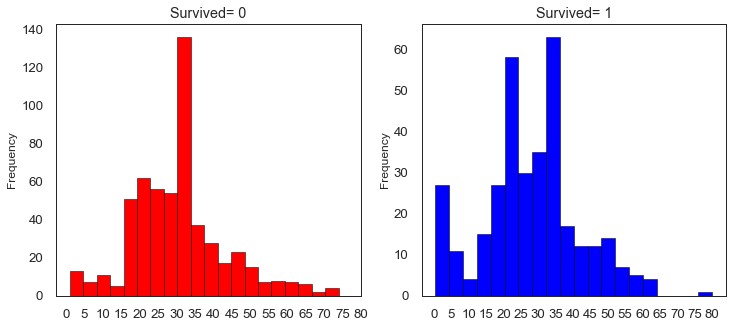

In [26]:
f,ax=plt.subplots(1,2,figsize=(12,5))
df_train[df_train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_train[df_train['Survived']==1].Age.plot.hist(ax=ax[1],color='blue',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

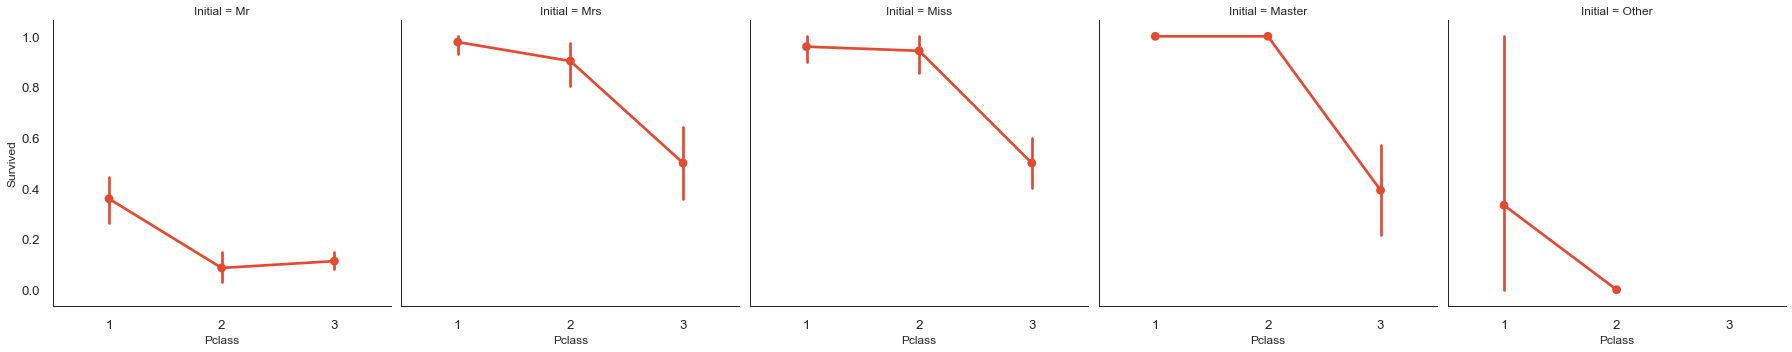

In [27]:
sns.factorplot('Pclass','Survived',col='Initial',data=df_train)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Categorical Feature: Embarked

In [28]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True). \
style.background_gradient(cmap='summer_r')

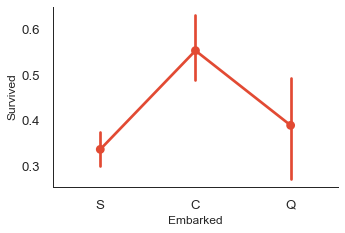

In [29]:
sns.factorplot('Embarked','Survived',data=df_train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

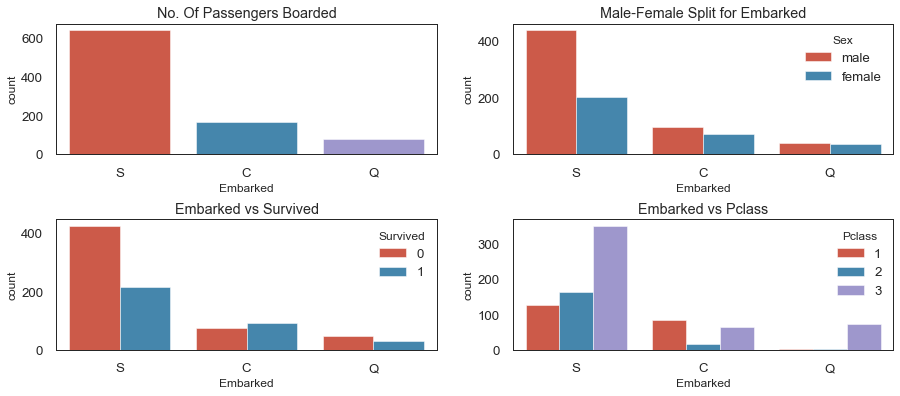

In [30]:
f,ax=plt.subplots(2,2,figsize=(15,6))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

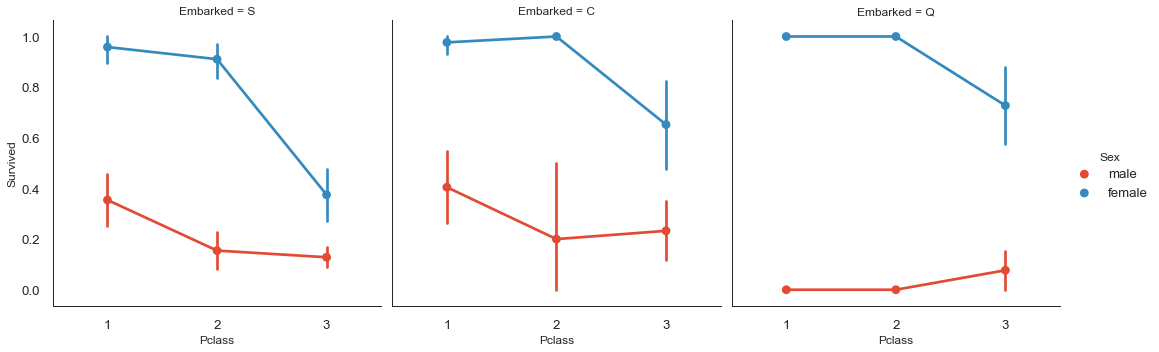

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)
plt.show()

#### Filling Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [32]:
df_train['Embarked'].fillna('S', inplace=True)

In [33]:
df_train.Embarked.isnull().any()# Finally No NaN values

False

### Discrete Feature: Sibsip

In [34]:
pd.crosstab([df_train.SibSp],df_train.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


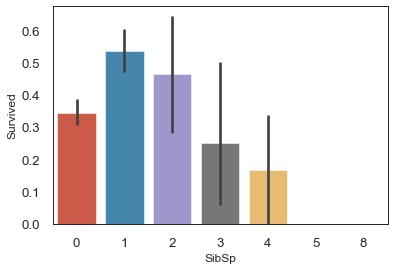

In [35]:
sns.barplot('SibSp','Survived',data=df_train)
plt.show()

In [36]:
pd.crosstab(df_train.SibSp,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Discrete Feature: Parch

In [37]:
pd.crosstab(df_train.Parch,df_train.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


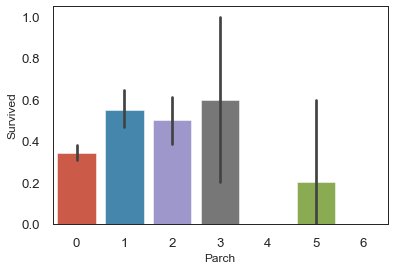

In [38]:
sns.barplot('Parch','Survived',data=df_train)
plt.show()

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Continuous Feature: Fare

In [39]:
print('Highest Fare was:',df_train['Fare'].max())
print('Lowest Fare was:',df_train['Fare'].min())
print('Average Fare was:',df_train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


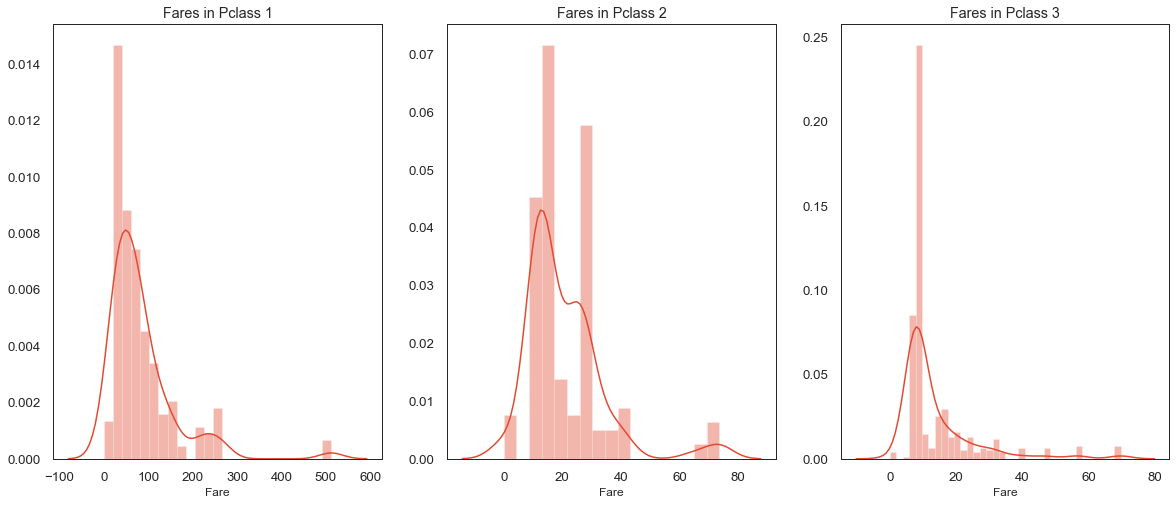

In [40]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_train[df_train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_train[df_train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_train[df_train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

### Summary of the Features:

Sex: The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

## Correlation between the features

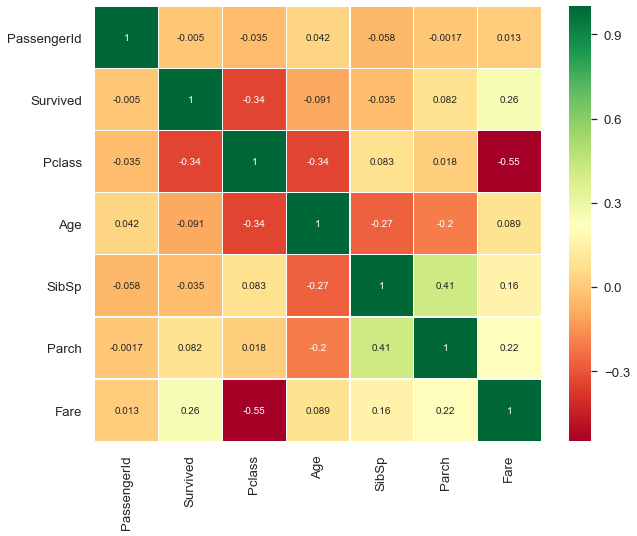

In [41]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Intrepreting the heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

**POSITIVE CORRELATION**: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

**NEGATIVE CORRELATION**: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

## Part2: Feature Engineering and Data Cleaning
Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

### Age Band 

Age is a continous feature and so need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

In [42]:
df_train['Age'].max()

80.0

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [43]:
df_train['Age_band'] = pd.cut(df_train['Age'], 5, labels=False)

In [44]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [45]:
#checking the number of passenegers in each band
df_train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


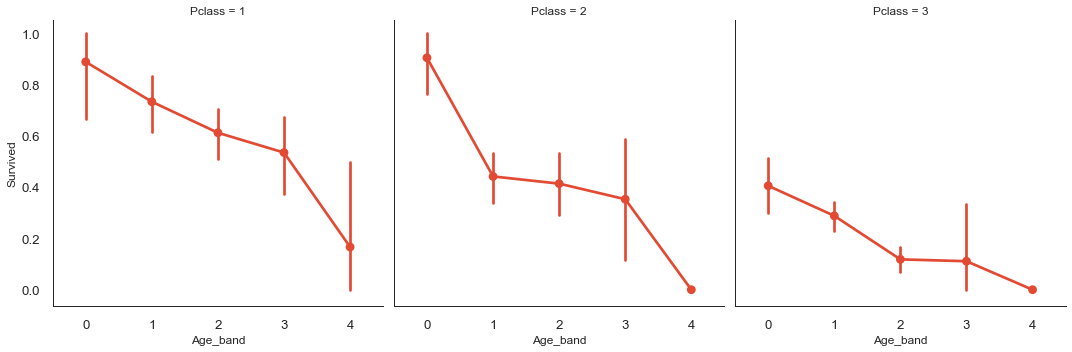

In [46]:
sns.factorplot('Age_band','Survived',data=df_train,col='Pclass')
plt.show()

Survival rate decreases as the age increases irrespective of the Pclass.

### Family_Size and Alone

At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

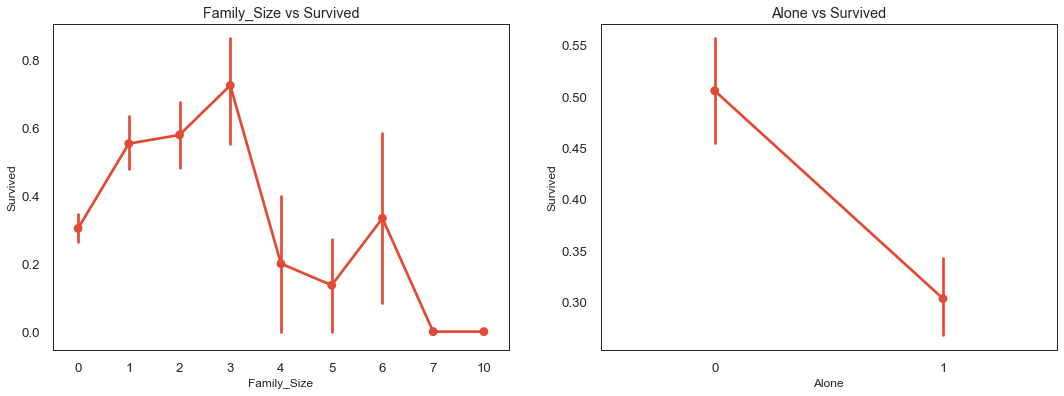

In [47]:
df_train['Family_Size']=0
df_train['Family_Size']=df_train['Parch']+df_train['SibSp']#family size
df_train['Alone']=0
df_train.loc[df_train.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=df_train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=df_train,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

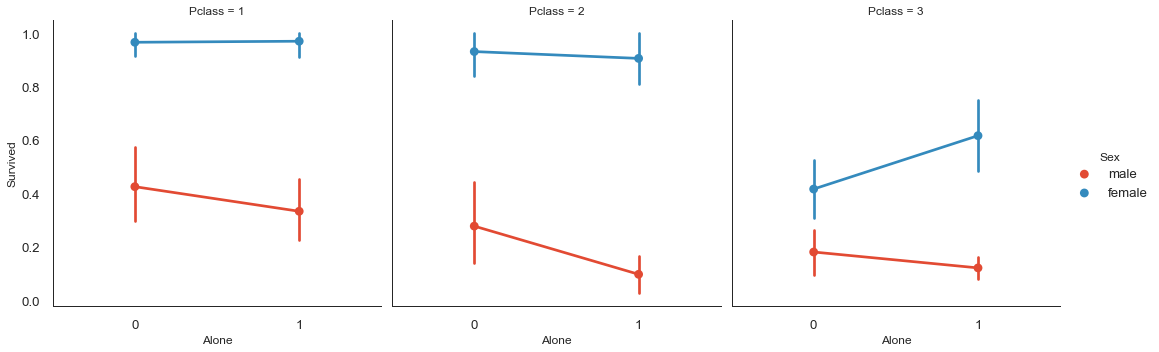

In [48]:
sns.factorplot('Alone','Survived',data=df_train,hue='Sex',col='Pclass')
plt.show()

### Fare Range

Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [49]:
df_train['Fare_Range']=pd.qcut(df_train['Fare'],4)
df_train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [50]:
df_train['Fare_cat']=0
df_train.loc[df_train['Fare']<=7.91,'Fare_cat']=0
df_train.loc[(df_train['Fare']>7.91)&(df_train['Fare']<=14.454),'Fare_cat']=1
df_train.loc[(df_train['Fare']>14.454)&(df_train['Fare']<=31),'Fare_cat']=2
df_train.loc[(df_train['Fare']>31)&(df_train['Fare']<=513),'Fare_cat']=3

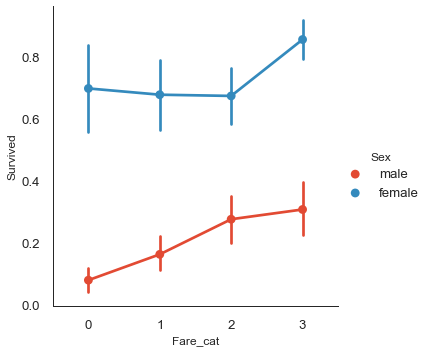

In [51]:
sns.factorplot('Fare_cat','Survived',data=df_train,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric

In [52]:
from sklearn import preprocessing

features = ['Sex', 'Embarked', 'Initial']
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df_train[feature])
    df_train[feature] = le.transform(df_train[feature])

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,3,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,3,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,2,0,1,"(7.91, 14.454]",1


### Drop Unnecessary Features

Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

In [54]:
df_train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
df_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'Initial', 'Age_band', 'Family_Size', 'Alone', 'Fare_cat'],
      dtype=object)

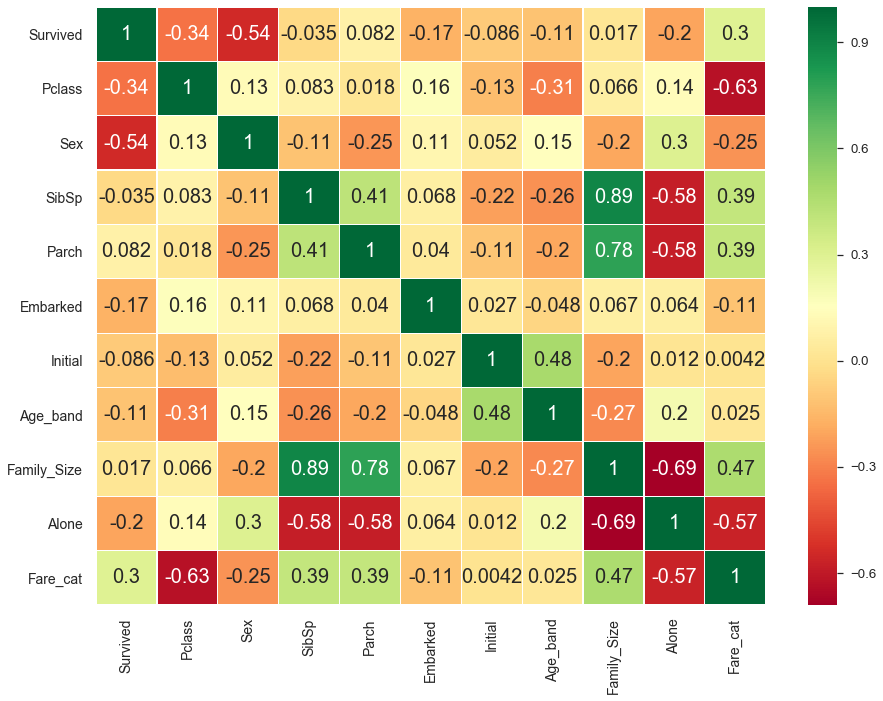

In [55]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(15,11)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Part 3. Predictive Modeling

To evaluate the performance of any machine learning model we need to test it on some unseen data.  Cross validation (CV) is one of the techniques used to test the effectiveness of a machine learning model. We will use the train-test split approach and the K-folds Cross Validation Approach.

In [56]:
from sklearn import svm #support vector Machine
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.metrics import accuracy_score
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [57]:
y_titanic_df = df_train['Survived']
X_titanic_df= df_train.drop('Survived',axis=1)

In [58]:
# train-test split approach
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

With the above train-test split approach, there is a possibility of a high bias if we have limited data, because we would miss some information about the data which we have not used for training. If our data is huge and our test sample and train sample has the same distribution then this approach could be acceptable.

### Support Vector Machine

In [59]:
svm_clf = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
svm_clf.fit(X_train , y_train)
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f'Accuracy for linear SVM is: {svm_accuracy:.4f}')

Accuracy for linear SVM is: 0.8324


### Radial Support Vector Machine

In [60]:
rdsvm_clf=svm.SVC(kernel='rbf',C=1,gamma=0.1)
rdsvm_clf.fit(X_train, y_train)
rdsvm_pred = rdsvm_clf.predict(X_test)
rdsvm_accuracy = accuracy_score(y_test, rdsvm_pred)
print(f'Accuracy for rbf SVM is: {rdsvm_accuracy: 4f}')

Accuracy for rbf SVM is:  0.871508


### Logistic Regression

In [61]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Accuracy for logistic Regression: {lr_accuracy:.4f}')

Accuracy for logistic Regression: 0.8659


### Decision Tree

In [62]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f'DecisionTree Accuracy: {dt_accuracy:.4f}')

DecisionTree Accuracy: 0.8603


### Random Forest

In [63]:
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

Random Forest Accuracy: 0.8827


## Cross Validation


Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

K-Fold is popular and easy to understand. It generally results in a less biased model compared to other methods. Because it ensures that every observation from the original dataset has the chance of appearing in both the training and the test set, it is one of the best approaches if we have limited input data.

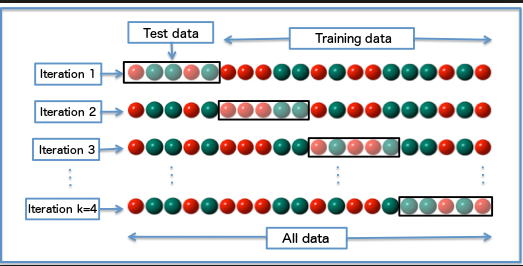

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score   # For the StratifiedKfold, use cross_val_score API
from sklearn.model_selection import cross_val_predict 

kfold = KFold(n_splits=5, random_state=22) # k=5, split the data into 5 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100)]
for i in models:
    cv_result = cross_val_score(i,X_titanic_df,y_titanic_df, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.786730,0.027240
Radial Svm,0.831624,0.028110
Logistic Regression,0.787904,0.022594
Decision Tree,0.800239,0.027085
Random Forest,0.810345,0.025807


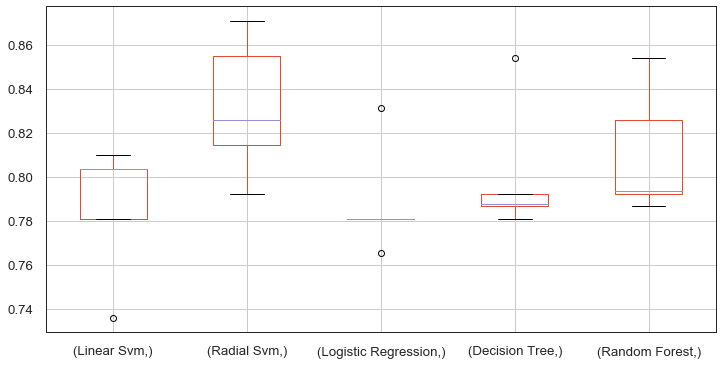

In [65]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

### Confusion Matrix

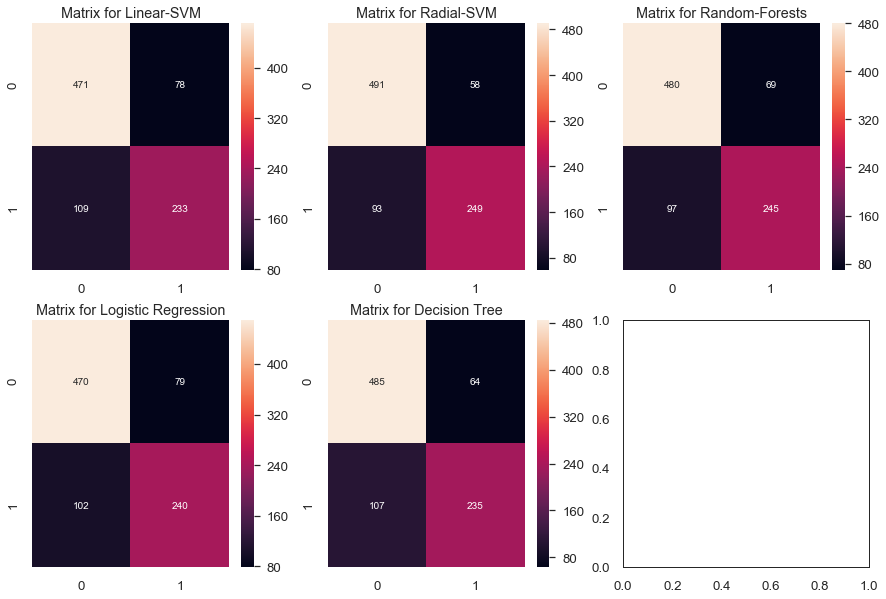

In [66]:
f,ax=plt.subplots(2,3,figsize=(15,10))
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X_titanic_df,y_titanic_df,cv=10)
sns.heatmap(confusion_matrix(y_titanic_df,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X_titanic_df,y_titanic_df,cv=10)
sns.heatmap(confusion_matrix(y_titanic_df,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Radial-SVM')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X_titanic_df,y_titanic_df,cv=10)
sns.heatmap(confusion_matrix(y_titanic_df,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X_titanic_df,y_titanic_df,cv=10)
sns.heatmap(confusion_matrix(y_titanic_df,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X_titanic_df,y_titanic_df,cv=10)
sns.heatmap(confusion_matrix(y_titanic_df,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**Interpreting Confusion Matrix**

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Let's consider the plot for rbf-SVM:

### Hyper-parameters Tuning

#### SVM

In [67]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X_titanic_df,y_titanic_df)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8316238779737619
SVC(C=0.7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   15.1s finished


### Random Forests

In [68]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_titanic_df,y_titanic_df)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   28.9s finished


0.8182223338145753
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The **best score** for **Rbf-Svm is 83.16%** with **C=0.7 and gamma=0.1**. For **RandomForest, best score is 81.82% with n_estimators=400**.

## Ensembling

**Voting Classifier**

A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a *hard voting* classifer.

In [69]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr',lr_clf), ('rf',rf_clf), ('svc',svm_clf)],
    voting='hard')

In [70]:
voting_clf.fit(X_titanic_df, y_titanic_df)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [71]:
for clf in (lr_clf, rf_clf, svm_clf, voting_clf):
    clf.fit(X_titanic_df, y_titanic_df)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8603351955307262
RandomForestClassifier 0.9441340782122905
SVC 0.8324022346368715
VotingClassifier 0.8715083798882681


If all classifiers are able to estimate class probabilities, then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called *soft voting*.

In [72]:
voting_clf = VotingClassifier(
    estimators=[('lr',lr_clf), ('rf',rf_clf), ('svc',svm.SVC(kernel='linear',probability=True))],
    voting='soft')

In [73]:
voting_clf.fit(X_titanic_df, y_titanic_df)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [74]:
for clf in (lr_clf, rf_clf, svm.SVC(kernel='linear',probability=True), voting_clf):
    clf.fit(X_titanic_df, y_titanic_df)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8603351955307262
RandomForestClassifier 0.9441340782122905
SVC 0.8324022346368715
VotingClassifier 0.88268156424581


#### Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

In [75]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(X_train , y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,y_test))
result=cross_val_score(model,X_titanic_df, y_titanic_df,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8659217877094972
The cross validated score for bagged Decision Tree is: 0.8205118601747815


#### Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

In [76]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X_titanic_df, y_titanic_df,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8271660424469414


#### Stochastic Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X_titanic_df, y_titanic_df,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.817116104868914


#### XG Boost

In [78]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X_titanic_df, y_titanic_df,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

ModuleNotFoundError: No module named 'xgboost'